# Concrete Strength

## Objective

To predict the concrete strength using the data available in file concrete_data.xls.

## Attribute Information

__Name -- Data Type -- Measurement -- Description__

 Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
 
 Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
 
 Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
 
 Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
 
 Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
 
 Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
 
 Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
 
 Age(age) -- quantitative -- Day (1~365) -- Input Variable
 
 Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

## Code

In [1]:
# account for/ignore version based warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries, modules

import numpy as np
import pandas as pd
import random

# visualization libraries, modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

In [3]:
# existing data

concrete_data = pd.read_csv('concrete.csv')
concrete_data2 = pd.read_csv('concrete.csv')

In [4]:
# confirming conversion of the csv file into a Pandas DataFrame

type(concrete_data)

pandas.core.frame.DataFrame

In [5]:
# determine shape of the dataset

concrete_data.shape

(1030, 9)

In [6]:
# First 5 rows of our dataset to get a sense of the dataset

concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [7]:
# determine shape of dataset copy

concrete_data2.shape

(1030, 9)

In [8]:
# to read into the different columns datatype

concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
# to read into the statistics of the dataset columnwise

concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### It can be observed that there are no null values

### slag, ash, superplastic and age seem to have outliers from the values 

In [10]:
# Although clear from the info() function, confirming that there are no Null values

concrete_data.isnull().values.any()

False

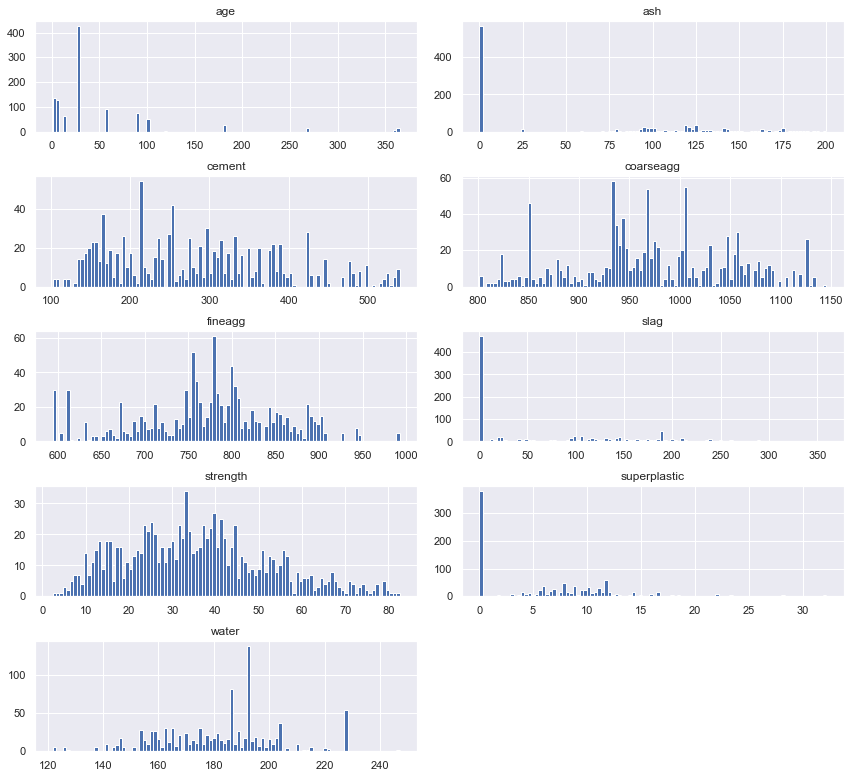

In [11]:
# visualize the distribution of each variable through histograms

columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
concrete_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

plt.tight_layout()

### As noted from the values earlier, slag, ash, age and superplastic seem to have outliers

### We also notice that in the case of slag, ash and superplastic more than 25% of the values are 0

### These are responsible for the outliers in these variables

### Let's try to better understand the outliers through box plots

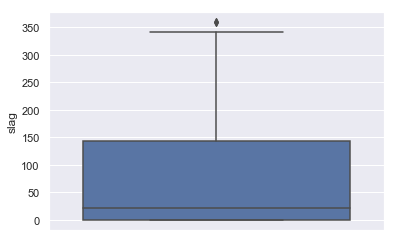

In [12]:
# slag

sns.boxplot(y = concrete_data['slag'])

### While there seem to be outliers and the data looks highly skewed, we observed earlier that a large number of observations were 0

In [13]:
# number of observations with value 0

concrete_data[concrete_data['slag'] == 0]['slag'].count()

471

### Therefore lets look at the plot of 'slag' values excluding 0 

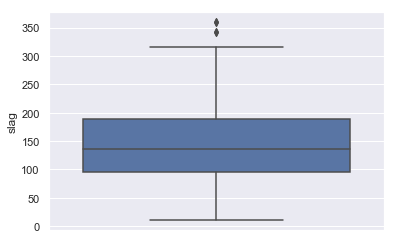

In [14]:
sns.boxplot(y = concrete_data[concrete_data['slag'] > 0]['slag'])

In [15]:
concrete_data[concrete_data['slag'] > 300]['strength'].count()

10

### We can conclude from the observations above that the number of outliers of 'slag' values when excluding 0 are small and therefore we replace the values greater than 300 with 300 below

In [16]:
concrete_data2['slag'] = np.where(concrete_data2['slag'] > 300, 300, concrete_data2['slag'])

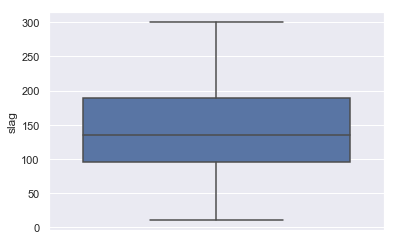

In [17]:
sns.boxplot(y = concrete_data2[concrete_data['slag'] > 0]['slag'])

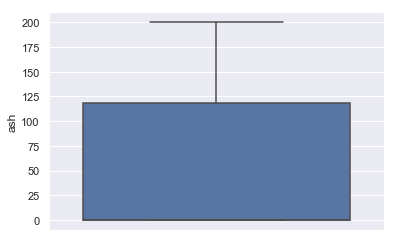

In [18]:
# ash

sns.boxplot(y = concrete_data['ash'])

### While the data looks highly skewed, we observed earlier that a large number of observations were 0

In [19]:
# number of observations with value 0

concrete_data[concrete_data['ash'] == 0]['ash'].count()

566

### Therefore lets look at the plot of 'ash' values excluding 0 

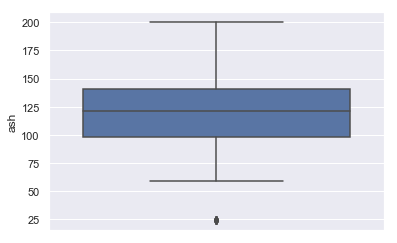

In [20]:
sns.boxplot(y = concrete_data[concrete_data['ash'] > 0]['ash'])

In [21]:
concrete_data[concrete_data['ash'] < 60]['ash'].count()

582

### We can conclude from the observations above that the number of outliers of 'ash' values when excluding 0 are small and therefore we replace the values lesser than 60 with 0 below

In [22]:
concrete_data2['ash'] = np.where(concrete_data2['ash'] < 60, 0, concrete_data2['ash'])

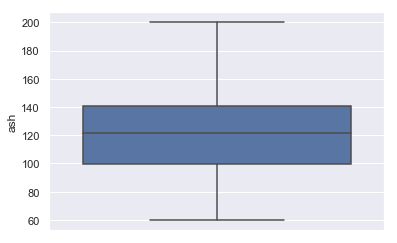

In [23]:
sns.boxplot(y = concrete_data2[concrete_data2['ash'] > 0]['ash'])

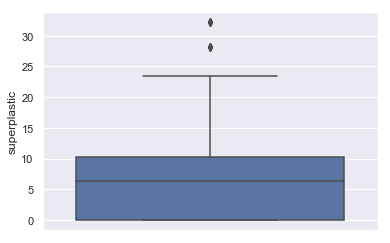

In [24]:
# superplastic

sns.boxplot(y = concrete_data['superplastic'])

### While there seem to be outliers and the data looks highly skewed, we observed earlier that a large number of observations were 0

In [25]:
# number of observations with value 0

concrete_data[concrete_data['superplastic'] == 0]['ash'].count()

379

### Therefore lets look at the plot of 'superplastic' values excluding 0 

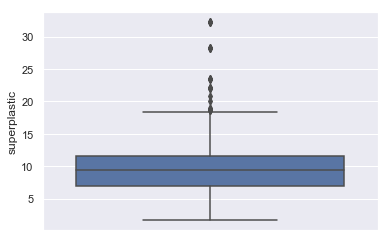

In [26]:
sns.boxplot(y = concrete_data[concrete_data['superplastic'] > 0]['superplastic'])

In [27]:
concrete_data[concrete_data['superplastic'] > 18]['strength'].count()

32

### We observe above that the outlier values of 'superplastic' are spread over a long range

### Therefore we shall not manipulate the outliers of 'superplastic'

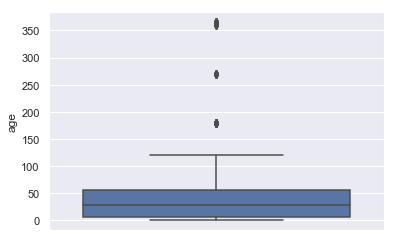

In [28]:
sns.boxplot(y = concrete_data['age'])

### 'age' seems to have a large right tail with a few high values as outliers

In [29]:
concrete_data[concrete_data['age'] > 150]['strength'].count()

59

### These are spread over a long range and therefore we shall not manipulate the outliers in the age column yet

### Let's look for outliers in the other predictor variables

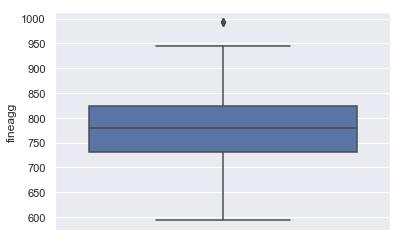

In [30]:
# fineagg

sns.boxplot(y = concrete_data['fineagg'])

### The number of outliers are not significantly large and the data seems to be well distributed

In [31]:
concrete_data[concrete_data['fineagg'] > 950]['strength'].count()

5

### Therefore, the values above 950 are replaced with 950 below

In [32]:
concrete_data2['fineagg'] = np.where(concrete_data2['fineagg'] > 950, 950, concrete_data2['fineagg'])

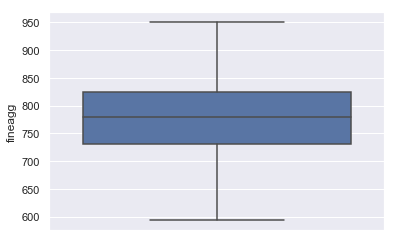

In [33]:
sns.boxplot(y = concrete_data2['fineagg'])

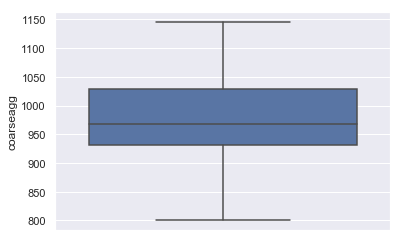

In [34]:
# coarseagg

sns.boxplot(y = concrete_data['coarseagg'])

### The observations have values evenly spread

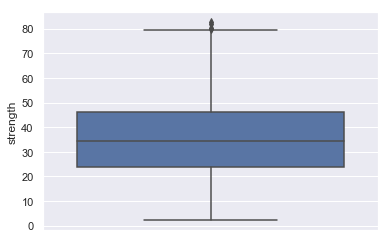

In [35]:
# Target variable 'strength'

sns.boxplot(y = concrete_data['strength'])

### We observe that the outliers are not significantly larger than the max value of quartile 4

### Also, we would like to keep the observations of the target variable unchanged

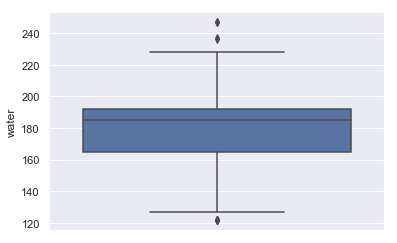

In [36]:
# water

sns.boxplot(y = concrete_data['water'])

### The outliers are neither significantly larger nor smaller than the maximum and minimum values of the quartiles respectively

### We keep the values as they are without manipulation

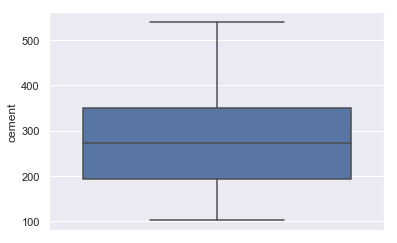

In [37]:
sns.boxplot(y = concrete_data['cement'])

### We observe no outliers in the independant variable 'cement'

## Bivariate Analysis

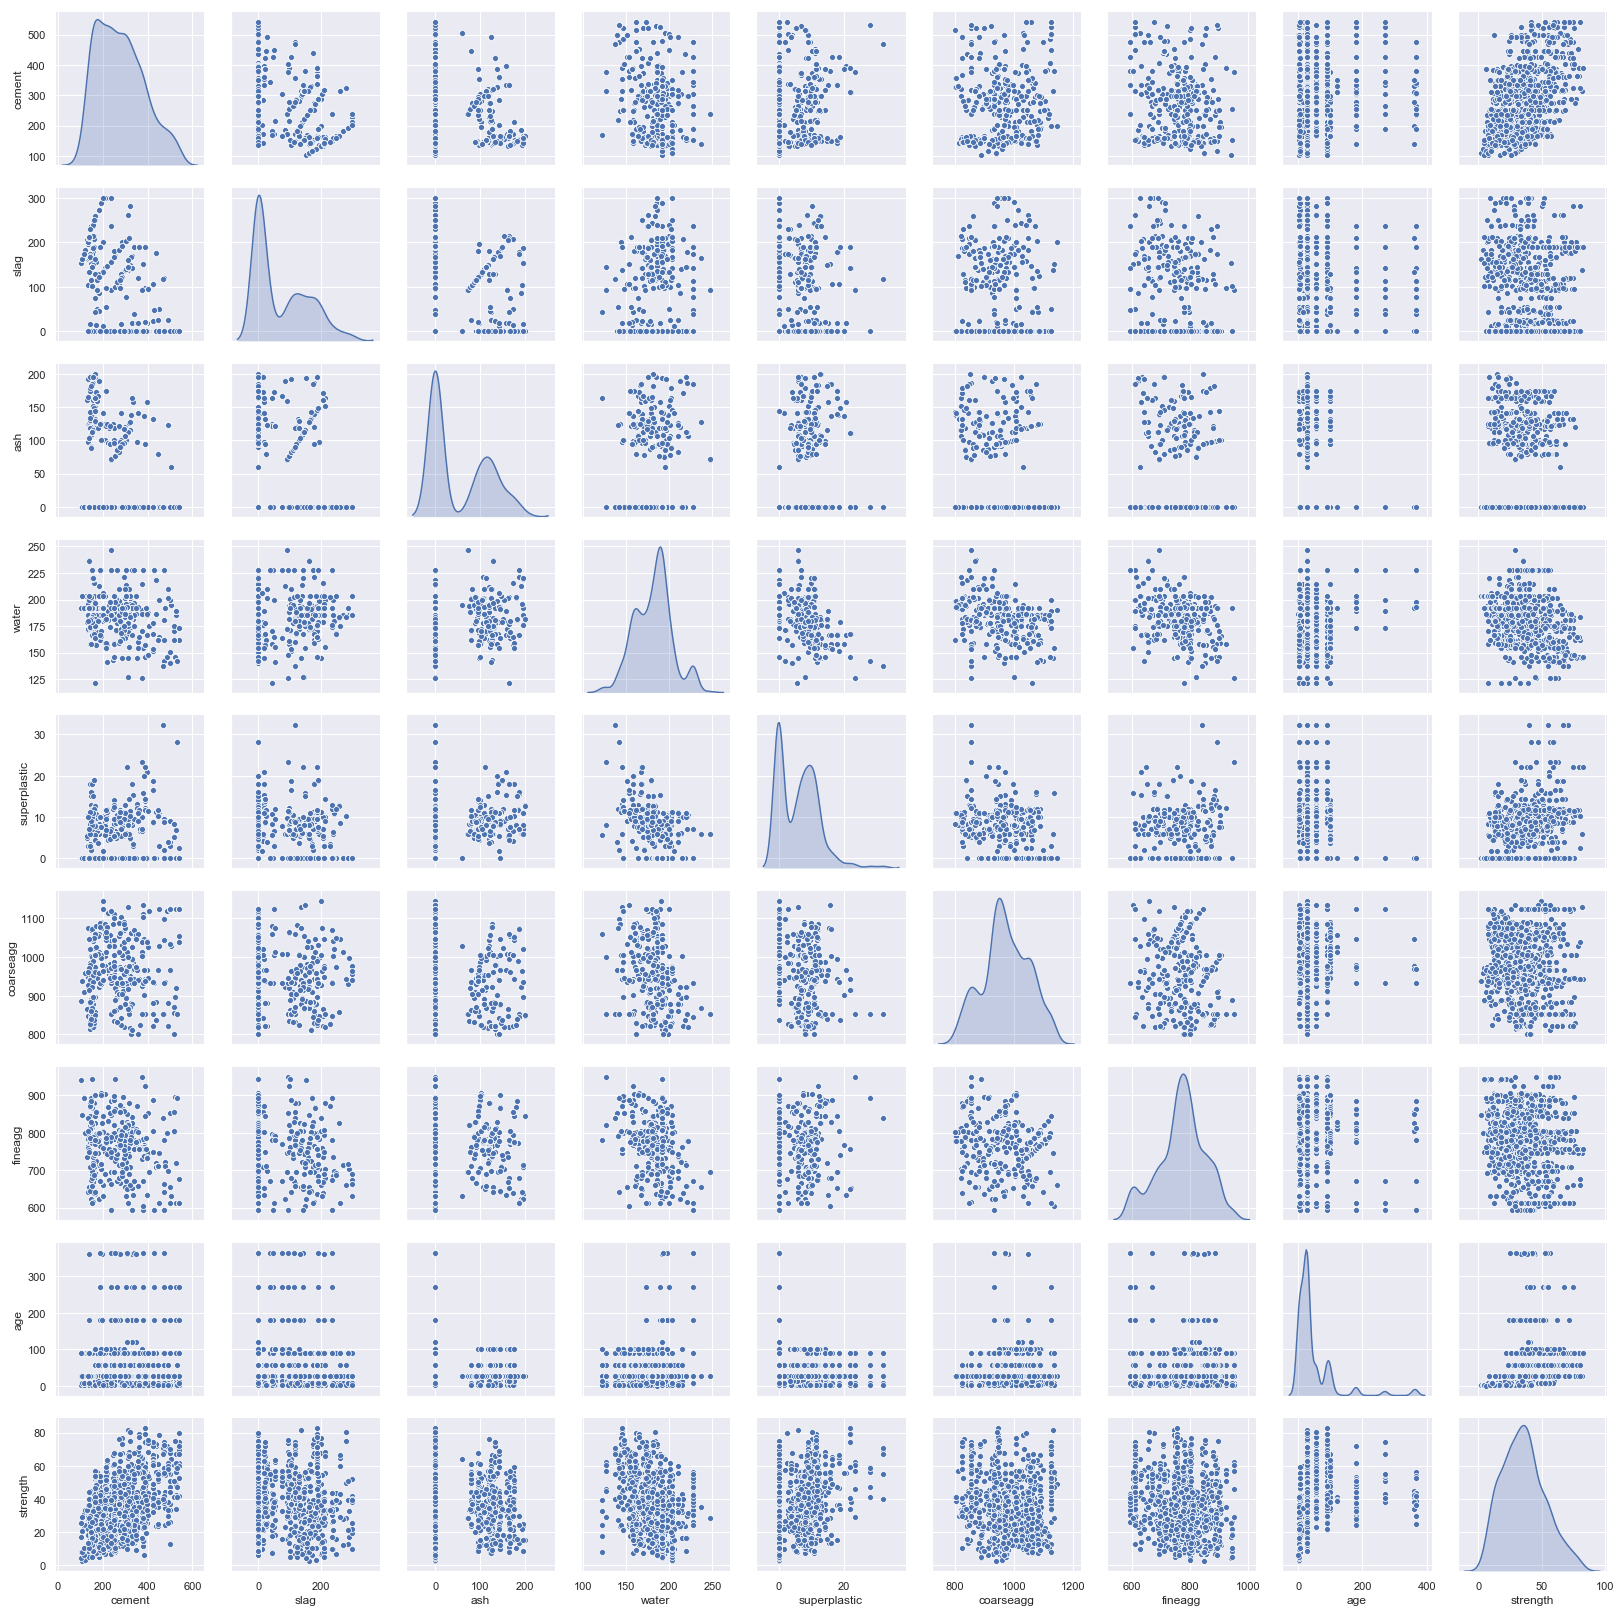

In [38]:
# Lets try to read into any relation betweeen the different columns through a Pair Plot

sns.pairplot(concrete_data2, diag_kind='kde')   # to plot density curve instead of histogram on the diag

### There seems to be a slight positive correlation between cement and strength

### We observe a bias in the density curves of slag, ash and superplastic due to a large number of observations in each column with the value 0

### We shall now look at the correlation between the different independant and dependant variables numerically

In [39]:
concrete_data2.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.276082,-0.395088,-0.081587,0.092386,-0.109349,-0.226483,0.081946,0.497832
slag,-0.276082,1.000000,-0.323368,0.107390,0.046659,-0.285623,-0.282546,-0.043375,0.136729
ash,-0.395088,-0.323368,1.000000,-0.252526,0.374733,-0.017904,0.082202,-0.153029,-0.108807
water,-0.081587,0.107390,-0.252526,1.000000,-0.657533,-0.182294,-0.446871,0.277618,-0.289633
superplastic,0.092386,0.046659,0.374733,-0.657533,1.000000,-0.265999,0.216644,-0.192700,0.366079
coarseagg,-0.109349,-0.285623,-0.017904,-0.182294,-0.265999,1.000000,-0.175591,-0.003016,-0.164935
fineagg,-0.226483,-0.282546,0.082202,-0.446871,0.216644,-0.175591,1.000000,-0.156742,-0.170650
age,0.081946,-0.043375,-0.153029,0.277618,-0.192700,-0.003016,-0.156742,1.000000,0.328873
strength,0.497832,0.136729,-0.108807,-0.289633,0.366079,-0.164935,-0.170650,0.328873,1.000000


### Cement as observed in the pairplot seems to have a slight positive correlation with target variable 'strength'

### 'water' and 'superplastic' seem to have a negative correlation

### Having said that, in both cases, the correlation is not too high

## Feature Engineering and Data model

### Let's create the model first 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = concrete_data2.drop(['strength'],axis=1)     # Predictor attribute columns (8 X m)
Y = concrete_data2['strength']   # Predicted value (continuous values) (1 X m)

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=103)
# x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.3, random_state=103)
# 103 - random seed number

# x_train.head()

### Next we create a copy of the model to iterate in Feature Engineering

In [41]:
data_prep = X

data_prep.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


### We build a list of tuples of all possible combinations of the predictor columns 

In [42]:
from itertools import combinations

columns_list = data_prep.columns
interactions = list(combinations(columns_list, 2))

interactions

[('cement', 'slag'),
 ('cement', 'ash'),
 ('cement', 'water'),
 ('cement', 'superplastic'),
 ('cement', 'coarseagg'),
 ('cement', 'fineagg'),
 ('cement', 'age'),
 ('slag', 'ash'),
 ('slag', 'water'),
 ('slag', 'superplastic'),
 ('slag', 'coarseagg'),
 ('slag', 'fineagg'),
 ('slag', 'age'),
 ('ash', 'water'),
 ('ash', 'superplastic'),
 ('ash', 'coarseagg'),
 ('ash', 'fineagg'),
 ('ash', 'age'),
 ('water', 'superplastic'),
 ('water', 'coarseagg'),
 ('water', 'fineagg'),
 ('water', 'age'),
 ('superplastic', 'coarseagg'),
 ('superplastic', 'fineagg'),
 ('superplastic', 'age'),
 ('coarseagg', 'fineagg'),
 ('coarseagg', 'age'),
 ('fineagg', 'age')]

### We observe the score for each combination and save them in a dictionary

In [43]:
interaction_dict = {}

# x_train, x_test, y_train, y_test = train_test_split(data_prep, Y, test_size=0.3, random_state=103)

for interaction in interactions:
   data_prep_int = data_prep
   data_prep_int['int'] = data_prep_int[interaction[0]] * data_prep_int[interaction[1]]
    
   x_train, x_test, y_train, y_test = train_test_split(data_prep_int, Y, test_size=0.3, random_state=103)
   
   num_folds = 10
   seed = 103

   kfold = KFold(n_splits=num_folds, random_state=seed)

   lr = LinearRegression()
   score = np.mean(cross_val_score(lr,data_prep_int,Y,scoring='r2', cv=kfold,n_jobs=1))
   interaction_dict[score] = interaction
interaction_dict

{0.5923245376594043: ('cement', 'slag'),
 0.5903657048912059: ('cement', 'ash'),
 0.590246861181083: ('cement', 'water'),
 0.595547410622665: ('cement', 'superplastic'),
 0.5913330803760922: ('cement', 'coarseagg'),
 0.5908099866508637: ('cement', 'fineagg'),
 0.59588825507695: ('cement', 'age'),
 0.5905667584629233: ('slag', 'ash'),
 0.5903103127586516: ('slag', 'water'),
 0.5927532836524041: ('slag', 'superplastic'),
 0.5911409563899074: ('slag', 'coarseagg'),
 0.5929579815040305: ('slag', 'fineagg'),
 0.5913665237044319: ('slag', 'age'),
 0.5901395386757631: ('ash', 'water'),
 0.5931483288818706: ('ash', 'superplastic'),
 0.5904580336354986: ('ash', 'coarseagg'),
 0.5914089251556771: ('ash', 'fineagg'),
 0.647363782343566: ('ash', 'age'),
 0.5996139100971016: ('water', 'superplastic'),
 0.6036228054155712: ('water', 'coarseagg'),
 0.590628639856164: ('water', 'fineagg'),
 0.6336717969658144: ('water', 'age'),
 0.5982140114050871: ('superplastic', 'coarseagg'),
 0.5906232609625592: (

### We analyse the top 5 combinations

In [44]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
   print(interaction_dict[interaction])

('superplastic', 'age')
('ash', 'age')
('water', 'age')
('water', 'coarseagg')
('water', 'superplastic')


### Going by domain knowledge, we go with the combinations:
### 1. (ash, age) 
### 2. (water, coarseagg) 
### 3. (water, fineagg)

In [45]:
data_prep_int = data_prep
data_prep_int['ash_age'] = data_prep_int['ash'] * data_prep_int['age']
data_prep_int['water_coarseagg'] = data_prep_int['water'] * data_prep_int['coarseagg']
data_prep_int['water_fineagg'] = data_prep_int['water'] * data_prep_int['fineagg']

x_train, x_test, y_train, y_test = train_test_split(data_prep_int, Y, test_size=0.3, random_state=103)

In [46]:
data_prep_int.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,int,ash_age,water_coarseagg,water_fineagg
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,20958.0,0.0,197761.30,152319.75
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,11146.8,1740.2,171090.64,126038.46
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,24113.6,2679.6,179323.06,161388.88
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,18760.0,0.0,212496.00,152760.00
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,19507.6,0.0,202462.42,134672.11


### We carried out the train-test split on the dataset with the newly engineered features

### To better compare the results: 
### We will first run our Linear Regression algorithm on the dataset without the new features

### We will then run the algorithm on our new dataset

### We will then run the algorithm on our new dataset

## Linear Regression

In [47]:
from sklearn import metrics

### We first run the model on the dataset with the original features

In [73]:
X2 = concrete_data2.drop(['strength'],axis=1)     # Predictor attribute columns (8 X m)
Y2 = concrete_data2['strength']   # Predicted value (continuous values) (1 X m)

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=103)
# 103 - random seed number

num_folds = 10
seed = 103

kfold = KFold(n_splits=num_folds, random_state=seed)

regression_model = LinearRegression()
score = np.mean(cross_val_score(regression_model,X2,Y2,scoring='r2', cv=kfold,n_jobs=1))

In [74]:
score

0.5914669892794725

In [76]:
scores = np.mean(cross_val_score(regression_model, X2, Y2, scoring='neg_mean_squared_error', cv=kfold))
scores

-109.34313541152972

### We observe low scores

### Let's try with polynomial features now

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = poly.fit_transform(x_train2)
x_test_poly = poly.transform(x_test2)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train_poly, y_train2)

y_pred = poly_clf.predict(x_test_poly)

#print(y_pred)

print(poly_clf.score(x_train_poly, y_train2))

-0.5753759499602036


In [78]:
#Out off sample (testing) R^2 is our measure of success
print(poly_clf.score(x_test_poly, y_test2))

-0.5447214845528772


### I observe negative values and would like to know the reason for this

### Next, we run the model on the dataset with the newly engineered features

In [81]:
lr2 = LinearRegression()
score = np.mean(cross_val_score(lr2,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.657733154187456

In [54]:
scores = np.mean(cross_val_score(lr2, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-92.15724025326378

### We observe improved scores relative to the linear model above

### Let's now run the same but with polynomial features

In [55]:
poly2 = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

poly_clf2 = linear_model.LinearRegression()

poly_clf2.fit(x_train_poly2, y_train)

y_pred = poly_clf2.predict(x_test_poly2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf2.score(x_train_poly2, y_train))

0.8103111794767821


In [56]:
#Out off sample (testing) R^2 is our measure of success
print(poly_clf2.score(x_test_poly2, y_test))

0.7357882830550424


### We observe a much more improved score, suggesting the possible use of higher degree models

### While this was at the cost of increased variables, the improvement in score is too significant to ignore

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfre = RandomForestRegressor(n_estimators=300, criterion = 'mse', max_depth = 32, min_samples_leaf=2)
score = np.mean(cross_val_score(rfre,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.9113667279919678

In [91]:
scores = np.mean(cross_val_score(rfre, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-24.600215563384932

### Hyperparameter Tuning

In [125]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [126]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

In [128]:
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [129]:
# view the best params

rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

### The above are the best set of hyperparameters from the Random Search done above 

### Model with one of the best set of hyperparameters

In [130]:
rfre1 = RandomForestRegressor(n_estimators=400, criterion = 'mse', max_features = 'sqrt', bootstrap=False, min_samples_split = 2)
score = np.mean(cross_val_score(rfre1,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.9296924929003607

In [131]:
scores = np.mean(cross_val_score(rfre1, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-19.15412667989559

### One more model with random settings

In [83]:
rfre = RandomForestRegressor(n_estimators=100, criterion = 'mse', max_depth = 32, min_samples_leaf=2)
score = np.mean(cross_val_score(rfre,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.909140329942773

In [92]:
scores = np.mean(cross_val_score(rfre, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-24.60159773585418

### We observe that we get the best score with the hyperparameters found using Random Search

## Boosting

### Adaboost

In [84]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve, precision_recall_curve

In [93]:
from sklearn.ensemble import AdaBoostRegressor
#abcl = AdaBoostRegressor(base_estimator=dt_model, n_estimators=50)
abre = AdaBoostRegressor(n_estimators= 1000)
score = np.mean(cross_val_score(abre,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.75913698974113

In [113]:
scores = np.mean(cross_val_score(abre, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-65.53660025891993

### Hyperparameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

ada = AdaBoostRegressor()

search_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search = GridSearchCV(estimator=ada,param_grid=search_grid,scoring='r2',n_jobs=1,cv=kfold)

In [138]:
search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=103, shuffle=False),
             error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [139]:
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

### Model with one of the best set of hyperparameters

In [141]:
abr = AdaBoostRegressor( n_estimators= 2000, learning_rate = 0.1)
score = np.mean(cross_val_score(abr,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.7890224123607975

In [142]:
scores = np.mean(cross_val_score(abr, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-57.072867882047646

### One more model with random hyperparameters

In [95]:
abr1 = AdaBoostRegressor( n_estimators= 750, learning_rate=1)
score = np.mean(cross_val_score(abr1,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.7635523005606952

In [96]:
scores = np.mean(cross_val_score(abr1, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-63.00222551010044

### We observe that we get the best score with the hyperparameters found using Grid Search

### Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gbre = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.05)
score = np.mean(cross_val_score(gbre,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.8136758876495268

In [112]:
scores = np.mean(cross_val_score(gbre, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-50.69567131876777

### A quick but incomplete check of iterative models with different hyperparameters

In [ ]:
n_estimators = [20, 50, 100, 200, 400, 500, 1000, 2000]
train_results = []
test_results = []

for estimator in n_estimators:
   gbr = GradientBoostingRegressor(n_estimators=estimator)
   gbr.fit(x_train, y_train)
   train_pred = gbr.predict(x_train)
   

### Model with one of the best results

In [99]:
gbr1 = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.2)
score = np.mean(cross_val_score(gbr1,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.9386010841615263

In [100]:
scores = np.mean(cross_val_score(gbr1, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-16.512118786160837

## Bagging

In [101]:
from sklearn.ensemble import BaggingRegressor

bgre = BaggingRegressor(n_estimators=10, max_samples= .7, bootstrap=True)
score = np.mean(cross_val_score(bgre,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.8976823999714793

In [115]:
scores = np.mean(cross_val_score(bgre, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-27.825153644344777

### A quick but incomplete check of iterative models with different hyperparameters

In [ ]:
n_estimators = [10, 20, 50, 100, 200, 500, 1000]
train_results = []
test_results = []

for estimator in n_estimators:
   bgr = BaggingRegressor(n_estimators=estimator)
   bgr.fit(x_train, y_train)
   train_pred = bgr.predict(x_train)

### Model with one of the best results

In [103]:
bgr1 = BaggingRegressor(n_estimators=100, max_samples= 0.7, bootstrap=True)
score = np.mean(cross_val_score(bgr1,X,Y,scoring='r2', cv=kfold,n_jobs=1))
score

0.907355465940831

In [104]:
scores = np.mean(cross_val_score(bgr1, X, Y, scoring='neg_mean_squared_error', cv=kfold))
scores

-24.732420692400968

## Final Comparison and Conclusion

### Lets begin by building the dataframe with the metrics results before hyperparameter tuning

In [118]:
model_score = pd.DataFrame([[0.6577, -92.1572],
                            [0.9113, -24.6002],
                            [0.7591, -64.6307],
                            [0.8136, -50.6934],
                            [0.8976, -29.8275]], 
                           index=['Linear Regression', 'Random Forest', 'Adaboost', 'Gradient Boosting', 'Bagging'],
                           columns= ['R2', 'Neg_MSE'])

### Lets try to visualise the same

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

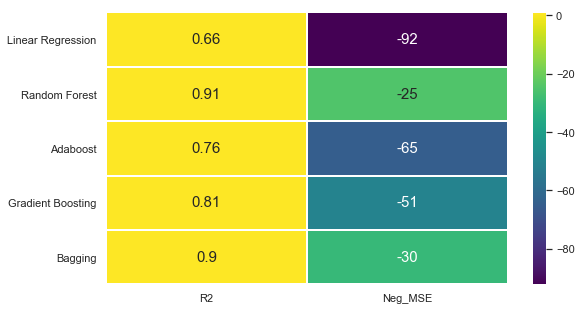

In [119]:
plt.figure(figsize=(9,5))
sns.heatmap(model_score, cmap='viridis', annot=True, annot_kws={"size":15}, linecolor='white', linewidths=1)
plt.tight_layout

### From initial results, Random Forests and Bagging seem to be providing the best results

### Now let's analyse the results after hyperparameter tuning

In [143]:
model_score2 = pd.DataFrame([[0.6577, -92.1572],
                            [0.9296, -19.1541],
                            [0.7890, -57.0728],
                            [0.9386, -16.5121],
                            [0.9073, -24.7324]], 
                           index=['Linear Regression', 'Random Forest', 'Adaboost', 'Gradient Boosting', 'Bagging'],
                           columns= ['R2', 'Neg_MSE'])

### Lets try to visualise the same

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

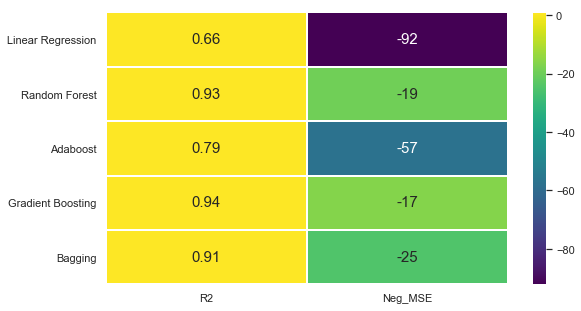

In [144]:
plt.figure(figsize=(9,5))
sns.heatmap(model_score2, cmap='viridis', annot=True, annot_kws={"size":15}, linecolor='white', linewidths=1)
plt.tight_layout

### We get to notice here how RandomSearch and GridSearch have helped in getting better results

### The steps were carried out in detail for RandomForests and Adaboost